In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import dataset

In [2]:
data = pd.read_csv('../artifacts/ds.csv')

In [3]:
data.head()

,category (text),category (binary),sentiment (text),sentiment (binary),feedback
0,claim,0,negative,1,I'm extremely disappointed with the lengthy an...
1,claim,0,negative,1,# Inefficient communication and lack of transp...
2,claim,0,negative,1,I recently had a terrible experience with the ...
3,claim,0,negative,1,##$ I am extremely dissatisfied with the vehic...
4,claim,0,negative,1,# Poor communication throughout the entire pro...


## Data Preprocessing

In [4]:
data.shape

(7585, 5)

#### remove duplicates

In [5]:
data.duplicated().sum()

np.int64(110)

In [6]:
duplicates = data[data.duplicated()]
print(duplicates)


     category (text)  category (binary) sentiment (text)  sentiment (binary)  \
38             claim                  0         negative                   1   
41             claim                  0         negative                   1   
497            claim                  0         negative                   1   
498            claim                  0         negative                   1   
572            claim                  0         negative                   1   
...              ...                ...              ...                 ...   
7266         service                  1         positive                   0   
7267         service                  1         positive                   0   
7268         service                  1         positive                   0   
7269         service                  1         positive                   0   
7463         service                  1         positive                   0   

                                       

In [7]:
data = data.drop_duplicates()
print(f"Dataset size after removing duplicates: {data.shape}")


Dataset size after removing duplicates: (7475, 5)


In [8]:
print(f"Remaining duplicates: {data.duplicated().sum()}")


Remaining duplicates: 0


#### checking null values

In [9]:
data.isnull().sum()

category (text)       0
category (binary)     0
sentiment (text)      0
sentiment (binary)    0
feedback              0
dtype: int64

### Text Preprocessing

##### convert upercase to lowercase

In [10]:
import re
import string

In [11]:
data["feedback"].head(5)

0    I'm extremely disappointed with the lengthy an...
1    # Inefficient communication and lack of transp...
2    I recently had a terrible experience with the ...
3    ##$ I am extremely dissatisfied with the vehic...
4    # Poor communication throughout the entire pro...
Name: feedback, dtype: object

In [12]:
data = data.copy()
data["feedback"] = data["feedback"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [13]:
data["feedback"].head()

0    i'm extremely disappointed with the lengthy an...
1    # inefficient communication and lack of transp...
2    i recently had a terrible experience with the ...
3    ##$ i am extremely dissatisfied with the vehic...
4    # poor communication throughout the entire pro...
Name: feedback, dtype: object

##### remove links

In [14]:
data["feedback"] = data["feedback"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [15]:
data["feedback"]

0       i'm extremely disappointed with the lengthy an...
1       # inefficient communication and lack of transp...
2       i recently had a terrible experience with the ...
3       ##$ i am extremely dissatisfied with the vehic...
4       # poor communication throughout the entire pro...
                              ...                        
7580    #### outstanding service from this vehicle ins...
7581    # excellent customer service at a vehicle insu...
7582    excellent service from the vehicle insurance c...
7583    # good service, excellent communication from i...
7584    ## outstanding customer service at triple aaa ...
Name: feedback, Length: 7475, dtype: object

##### remove punctuations

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["feedback"] = data["feedback"].apply(remove_punctuation)

In [18]:
data["feedback"].head(5)

0    im extremely disappointed with the lengthy and...
1     inefficient communication and lack of transpa...
2    i recently had a terrible experience with the ...
3     i am extremely dissatisfied with the vehicle ...
4     poor communication throughout the entire proc...
Name: feedback, dtype: object

##### remove numbers

In [19]:
data["feedback"].iloc[90]


'please investigate my claim asap communication has been poor throughout this process ive been waiting for 3 weeks and im still unsure about the status of my claim its unacceptable to keep customers in the dark about their claims the insurance company needs to improve its communication and claim processing time i demand a prompt response regarding the status of my claim this has been a terrible experience and im not satisfied with the service ive received so far'

In [20]:
data["feedback"] = data["feedback"].str.replace(r'\d+', '', regex=True)

In [21]:
data["feedback"].iloc[90]

'please investigate my claim asap communication has been poor throughout this process ive been waiting for  weeks and im still unsure about the status of my claim its unacceptable to keep customers in the dark about their claims the insurance company needs to improve its communication and claim processing time i demand a prompt response regarding the status of my claim this has been a terrible experience and im not satisfied with the service ive received so far'

##### remove stopwords

In [22]:
!pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: F:\Projects\github projects\sentiment_analysis_research\env\Scripts\python.exe -m pip install --upgrade pip


In [23]:
import nltk

##### downlad stopwords for english language

In [24]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw=file.read().splitlines()

In [26]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [27]:
data["feedback"] = data["feedback"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [28]:
data["feedback"].head(5)

0    im extremely disappointed lengthy unsatisfacto...
1    inefficient communication lack transparency th...
2    recently terrible experience vehicle insurance...
3    extremely dissatisfied vehicle insurance claim...
4    poor communication throughout entire process u...
Name: feedback, dtype: object

##### stemming

In [29]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [30]:
data["feedback"] = data["feedback"].apply(lambda x: " ".join([ps.stem(x) for x in x.split()]))

In [31]:
data

,category (text),category (binary),sentiment (text),sentiment (binary),feedback
0,claim,0,negative,1,im extrem disappoint lengthi unsatisfactori ve...
1,claim,0,negative,1,ineffici commun lack transpar throughout claim...
2,claim,0,negative,1,recent terribl experi vehicl insur claim proce...
3,claim,0,negative,1,extrem dissatisfi vehicl insur claim process t...
4,claim,0,negative,1,poor commun throughout entir process unwilling...
...,...,...,...,...,...
7580,service,1,positive,0,outstand servic vehicl insur compani team extr...
7581,service,1,positive,0,excel custom servic vehicl insur compani repre...
7582,service,1,positive,0,excel servic vehicl insur compani repres highl...
7583,service,1,positive,0,good servic excel commun insur compani repres ...


## Vectorization

##### Bulidng Vocabulary

In [204]:
from collections import Counter
vocab=Counter()

In [205]:
vocab

Counter()

In [206]:
for sentence in data["feedback"]:
    vocab.update(sentence.split())

In [207]:
len(vocab)

3324

In [208]:
data.shape

(7475, 5)

In [209]:
vocab

Counter({'insur': 10729,
         'polici': 7885,
         'compani': 6140,
         'custom': 6014,
         'vehicl': 5923,
         'servic': 5898,
         'claim': 5817,
         'process': 5001,
         'experi': 3515,
         'term': 3476,
         'provid': 2989,
         'im': 2730,
         'commun': 2485,
         'make': 2422,
         'coverag': 2283,
         'recommend': 2256,
         'would': 2161,
         'respons': 2089,
         'team': 2086,
         'transpar': 2065,
         'time': 2065,
         'clear': 2023,
         'issu': 1941,
         'frustrat': 1934,
         'understand': 1873,
         'lack': 1869,
         'resolv': 1766,
         'expect': 1615,
         'help': 1602,
         'anyon': 1597,
         'repres': 1547,
         'extrem': 1527,
         'receiv': 1522,
         'profession': 1505,
         'effici': 1428,
         'need': 1393,
         'fair': 1392,
         'highli': 1382,
         'overal': 1381,
         'poor': 1378,
         

##### creating vocabulary

In [210]:
tokens=[key for key in vocab if vocab[key]>50]

In [211]:
len(tokens)

625

##### save vocabulary

In [212]:
def save_vocubulary(lines, filename):
    data='\n'.join(lines)
    file=open(filename,'w',encoding='utf-8')
    file.write(data)
    file.close()

save_vocubulary(tokens,'../static/model/vocabulary.txt')

### Divide Dataset

In [213]:
X=data["feedback"]
Y=data["sentiment (binary)"]
Z=data["category (binary)"]

In [214]:
X

0       im extrem disappoint lengthi unsatisfactori ve...
1       ineffici commun lack transpar throughout claim...
2       recent terribl experi vehicl insur claim proce...
3       extrem dissatisfi vehicl insur claim process t...
4       poor commun throughout entir process unwilling...
                              ...                        
7580    outstand servic vehicl insur compani team extr...
7581    excel custom servic vehicl insur compani repre...
7582    excel servic vehicl insur compani repres highl...
7583    good servic excel commun insur compani repres ...
7584    outstand custom servic tripl aaa insur unparal...
Name: feedback, Length: 7475, dtype: object

In [215]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
7580    0
7581    0
7582    0
7583    0
7584    0
Name: sentiment (binary), Length: 7475, dtype: int64

In [216]:
Z

0       0
1       0
2       0
3       0
4       0
       ..
7580    1
7581    1
7582    1
7583    1
7584    1
Name: category (binary), Length: 7475, dtype: int64

In [217]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: F:\Projects\github projects\sentiment_analysis_research\env\Scripts\python.exe -m pip install --upgrade pip


In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test, Z_train, Z_test = train_test_split(X, Y, Z, test_size=0.2)

In [219]:
X_train.shape

(5980,)

In [220]:
len(X_test)

1495

In [221]:
len(Y_train)

5980

In [222]:
len(Y_test)

1495

In [223]:
len(Z_train)

5980

In [224]:
len(Z_test)

1495

### Vectorization

In [225]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [226]:
vectorizer = TfidfVectorizer(
    max_features=3000,  
    ngram_range=(1, 2),  # Use unigrams and bigrams for richer features
    stop_words='english'  # Remove common stopwords
)


vectorized_X_train = vectorizer.fit_transform(X_train)
vectorized_X_test = vectorizer.transform(X_test)

import pickle
with open('../static/model/tfidf_vectorizer.pickle', 'wb') as file:
    pickle.dump(vectorizer, file)

##### vextorized the training feedbacks

In [227]:
for i in vectorized_X_train[0]:
    print(i)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 52 stored elements and shape (1, 3000)>
  Coords	Values
  (0, 314)	0.14483407760516764
  (0, 175)	0.13286396708141404
  (0, 2911)	0.0428307580537001
  (0, 1391)	0.03399472990684685
  (0, 1806)	0.1147114276992676
  (0, 2594)	0.131741907707871
  (0, 809)	0.17435302252546606
  (0, 1001)	0.08892011226016033
  (0, 2710)	0.07477856655764428
  (0, 2511)	0.13360011859134313
  (0, 260)	0.10718576732244482
  (0, 1924)	0.10908281329373105
  (0, 767)	0.17164782166933834
  (0, 2819)	0.17113438421551366
  (0, 2036)	0.06441295388775034
  (0, 968)	0.10685559100793449
  (0, 562)	0.15477069566271706
  (0, 821)	0.18023375528886645
  (0, 592)	0.050862476225033586
  (0, 1471)	0.1384336735674091
  (0, 894)	0.07923883681482191
  (0, 2822)	0.14945461262346016
  (0, 857)	0.14798798813762376
  (0, 477)	0.11589331522458043
  (0, 2115)	0.1352849410302704
  :	:
  (0, 209)	0.15522529884350475
  (0, 1872)	0.11752182806286281
  (0, 772)	0.0820550548280591


In [228]:
vectorized_X_train[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 52 stored elements and shape (1, 3000)>

##### vectorize the test feedbacks

In [229]:
vectorized_X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 70321 stored elements and shape (1495, 3000)>

In [230]:
vectorized_X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 278107 stored elements and shape (5980, 3000)>

In [231]:
Y_train

4789     0
551      1
7482     0
6211    10
40       1
        ..
5461     1
886     10
1955     0
6080    10
6620    10
Name: sentiment (binary), Length: 5980, dtype: int64

In [232]:
Y_train.value_counts()

sentiment (binary)
1     2381
0     2036
10    1563
Name: count, dtype: int64

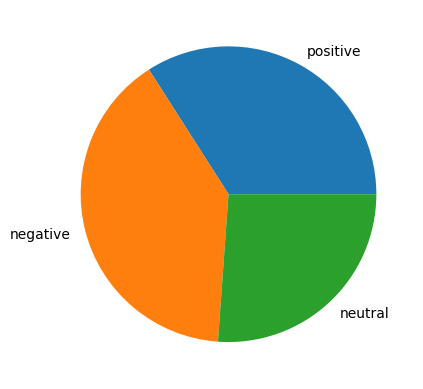

In [233]:
plt.pie(np.array([Y_train.value_counts()[0],Y_train.value_counts()[1],Y_train.value_counts()[10]]),labels=['positive','negative','neutral'])
plt.show()

In [234]:
Z_train.value_counts()

category (binary)
10    2041
1     1998
0     1941
Name: count, dtype: int64

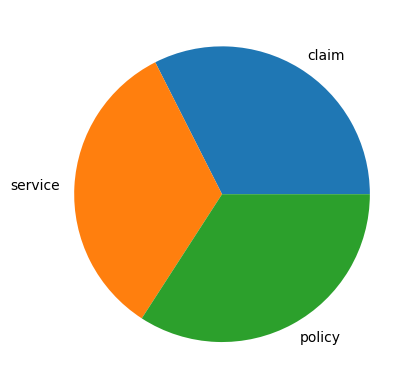

In [235]:
plt.pie(np.array([Z_train.value_counts()[0],Z_train.value_counts()[1],Z_train.value_counts()[10]]),labels=['claim','service','policy'])
plt.show()

### Handle imbalance dataset

In [236]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: F:\Projects\github projects\sentiment_analysis_research\env\Scripts\python.exe -m pip install --upgrade pip


In [237]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
vectorized_X_train_smote,Y_train_smote=smote.fit_resample(vectorized_X_train,Y_train)
print(vectorized_X_train_smote.shape,Y_train_smote.shape)

(7143, 3000) (7143,)


In [238]:
Y_train_smote.value_counts()

sentiment (binary)
0     2381
1     2381
10    2381
Name: count, dtype: int64

In [239]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
vectorized_X_train_smote_category,Z_train_smote=smote.fit_resample(vectorized_X_train,Z_train)
print(vectorized_X_train_smote_category.shape,Z_train_smote.shape)

(6123, 3000) (6123,)


In [240]:
Z_train_smote.value_counts()

category (binary)
10    2041
0     2041
1     2041
Name: count, dtype: int64

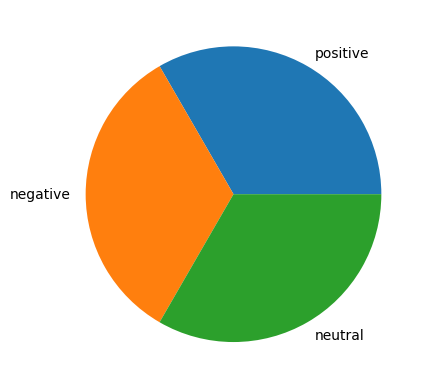

In [241]:
plt.pie(np.array([Y_train_smote.value_counts()[0],Y_train_smote.value_counts()[1],Y_train_smote.value_counts()[10]]),labels=['positive','negative','neutral'])
plt.show()

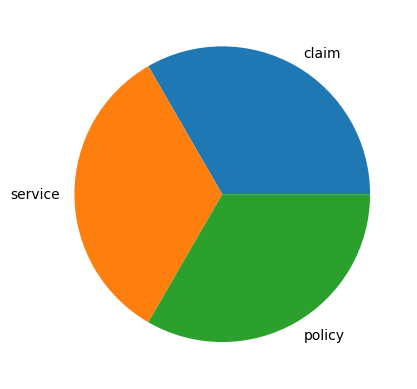

In [242]:
plt.pie(np.array([Z_train_smote.value_counts()[0],Z_train_smote.value_counts()[1],Z_train_smote.value_counts()[10]]),labels=['claim','service','policy'])
plt.show()

##### using this dataset for train & test the sentiment models

In [243]:
vectorized_X_train_smote

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 359243 stored elements and shape (7143, 3000)>

In [244]:
Y_train_smote

0        0
1        1
2        0
3       10
4        1
        ..
7138    10
7139    10
7140    10
7141    10
7142    10
Name: sentiment (binary), Length: 7143, dtype: int64

In [245]:
vectorized_X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 70321 stored elements and shape (1495, 3000)>

In [246]:
Y_test

6063    10
6287    10
7239     0
3766     1
1620     0
        ..
631      1
571      1
1852     0
1488    10
5288     1
Name: sentiment (binary), Length: 1495, dtype: int64

##### using this dataset for train & test the models for categorization

In [247]:
vectorized_X_train_smote_category

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 288572 stored elements and shape (6123, 3000)>

In [248]:
Z_train_smote

0       10
1        0
2        1
3        1
4        0
        ..
6118     1
6119     1
6120     1
6121     1
6122     1
Name: category (binary), Length: 6123, dtype: int64

In [249]:
vectorized_X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 70321 stored elements and shape (1495, 3000)>

In [250]:
Z_test

6063     1
6287     1
7239     1
3766    10
1620     0
        ..
631      0
571      0
1852     0
1488     0
5288     1
Name: category (binary), Length: 1495, dtype: int64

## Model Training & Evaluation 

In [251]:
from sklearn.model_selection import GridSearchCV

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Model Training & Evaluation for Sentiment

In [253]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    prec = round(precision_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    
    print(f'Training Scores:\n\tAccuracy: {acc}\n\tPrecision: {prec}\n\tRecall: {rec}\n\tF1-Score: {f1}\n')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    prec = round(precision_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    
    print(f'Testing Scores:\n\tAccuracy: {acc}\n\tPrecision: {prec}\n\tRecall: {rec}\n\tF1-Score: {f1}\n')


##### logistic regression

In [254]:
# Define parameter grid
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}

# Perform Grid Search
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(vectorized_X_train_smote, Y_train_smote)

# Get the best parameters
best_params_lr = grid_search_lr.best_params_
print(f"Best parameters for Logistic Regression: {best_params_lr}")

Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}


In [255]:
# Train with the best parameters
lr = LogisticRegression(**best_params_lr)
lr.fit(vectorized_X_train_smote, Y_train_smote)

LogisticRegression(C=10, solver='liblinear')

In [256]:
Y_train_predict=lr.predict(vectorized_X_train_smote)

In [257]:
Y_train_predict

array([ 0,  1,  0, ..., 10, 10, 10])

In [258]:
Y_train_smote

0        0
1        1
2        0
3       10
4        1
        ..
7138    10
7139    10
7140    10
7141    10
7142    10
Name: sentiment (binary), Length: 7143, dtype: int64

In [259]:
training_scores(Y_train_smote,Y_train_predict)

Training Scores:
	Accuracy: 0.99
	Precision: 0.99
	Recall: 0.99
	F1-Score: 0.99



In [260]:
Y_test_predict=lr.predict(vectorized_X_test)

In [261]:
Y_test_predict

array([10, 10,  0, ...,  0, 10,  1])

In [262]:
Y_test

6063    10
6287    10
7239     0
3766     1
1620     0
        ..
631      1
571      1
1852     0
1488    10
5288     1
Name: sentiment (binary), Length: 1495, dtype: int64

In [263]:
validation_scores(Y_test, Y_test_predict)

Testing Scores:
	Accuracy: 0.912
	Precision: 0.911
	Recall: 0.912
	F1-Score: 0.912



##### Naive Bayes

In [264]:
# Define hyperparameter grid for Multinomial Naïve Bayes
param_grid_nb = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Perform Grid Search
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(vectorized_X_train_smote, Y_train_smote)

# Get the best hyperparameter
best_alpha_nb = grid_search_nb.best_params_['alpha']
print(f"Best alpha for Naïve Bayes: {best_alpha_nb}")

mnb = MultinomialNB(alpha=best_alpha_nb)
mnb.fit(vectorized_X_train_smote, Y_train_smote)

Y_train_predict = mnb.predict(vectorized_X_train_smote)
Y_test_predict = mnb.predict(vectorized_X_test)
training_scores(Y_train_smote, Y_train_predict)
validation_scores(Y_test, Y_test_predict)

Best alpha for Naïve Bayes: 0.001
Training Scores:
	Accuracy: 0.931
	Precision: 0.933
	Recall: 0.931
	F1-Score: 0.931

Testing Scores:
	Accuracy: 0.903
	Precision: 0.909
	Recall: 0.903
	F1-Score: 0.904



##### Decision Tree

In [265]:
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(vectorized_X_train_smote, Y_train_smote)

best_params_dt = grid_search_dt.best_params_
print(f"Best parameters for Decision Tree: {best_params_dt}")

dt = DecisionTreeClassifier(**best_params_dt)
dt.fit(vectorized_X_train_smote, Y_train_smote)


Y_train_predict = dt.predict(vectorized_X_train_smote)
Y_test_predict = dt.predict(vectorized_X_test)
training_scores(Y_train_smote, Y_train_predict)
validation_scores(Y_test, Y_test_predict)

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1-Score: 1.0

Testing Scores:
	Accuracy: 0.845
	Precision: 0.844
	Recall: 0.845
	F1-Score: 0.845



##### Random forest

In [266]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(vectorized_X_train_smote, Y_train_smote)

best_params_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

rf = RandomForestClassifier(**best_params_rf)
rf.fit(vectorized_X_train_smote, Y_train_smote)
Y_train_predict=rf.predict(vectorized_X_train_smote)
Y_test_predict=rf.predict(vectorized_X_test)
training_scores(Y_train_smote,Y_train_predict)
validation_scores(Y_test, Y_test_predict)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Training Scores:
	Accuracy: 0.999
	Precision: 0.999
	Recall: 0.999
	F1-Score: 0.999

Testing Scores:
	Accuracy: 0.91
	Precision: 0.91
	Recall: 0.91
	F1-Score: 0.91



##### Support vector machine

In [267]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(vectorized_X_train_smote, Y_train_smote)

best_params_svm = grid_search_svm.best_params_
print(f"Best parameters for SVM: {best_params_svm}")

svm = SVC(**best_params_svm)
svm.fit(vectorized_X_train_smote, Y_train_smote)
Y_train_predict=svm.predict(vectorized_X_train_smote)
Y_test_predict=svm.predict(vectorized_X_test)
training_scores(Y_train_smote,Y_train_predict)
validation_scores(Y_test, Y_test_predict)

Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1-Score: 1.0

Testing Scores:
	Accuracy: 0.919
	Precision: 0.918
	Recall: 0.919
	F1-Score: 0.919



### saving the model

In [268]:
import pickle
with open ('../static/model/sentiment_model.pickle','wb') as file:
    pickle.dump(mnb,file)

### Model Training & Evaluation for Categorization

##### logistic regression

In [269]:
# Define parameter grid
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}

# Perform Grid Search
grid_search_lrc = GridSearchCV(LogisticRegression(), param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_lrc.fit(vectorized_X_train_smote_category,Z_train_smote)

best_params_lrc = grid_search_lrc.best_params_
print(f"Best parameters for Logistic Regression: {best_params_lrc}")

lrc = LogisticRegression(**best_params_lrc)
lrc.fit(vectorized_X_train_smote_category,Z_train_smote)

Best parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}


LogisticRegression(C=100, solver='liblinear')

In [270]:
Z_train_predict=lrc.predict(vectorized_X_train_smote_category)

In [271]:
Z_train_predict

array([10,  0,  1, ...,  1,  1,  1])

In [272]:
Z_train_smote

0       10
1        0
2        1
3        1
4        0
        ..
6118     1
6119     1
6120     1
6121     1
6122     1
Name: category (binary), Length: 6123, dtype: int64

In [273]:
training_scores(Z_train_smote,Z_train_predict)

Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1-Score: 1.0



In [274]:
Z_test_predict=lrc.predict(vectorized_X_test)

In [275]:
Z_test_predict

array([1, 1, 1, ..., 0, 0, 1])

In [276]:
Z_test

6063     1
6287     1
7239     1
3766    10
1620     0
        ..
631      0
571      0
1852     0
1488     0
5288     1
Name: category (binary), Length: 1495, dtype: int64

In [277]:
 validation_scores(Z_test, Z_test_predict)

Testing Scores:
	Accuracy: 0.981
	Precision: 0.981
	Recall: 0.981
	F1-Score: 0.981



##### Naive Baiyes

In [278]:
# Define hyperparameter grid for Multinomial Naïve Bayes
param_grid_nb = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Perform Grid Search
grid_search_nbc = GridSearchCV(MultinomialNB(), param_grid_nb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_nbc.fit(vectorized_X_train_smote_category,Z_train_smote)  # Fit to training data

# Get the best hyperparameter
best_alpha_nbc = grid_search_nbc.best_params_['alpha']
print(f"Best alpha for Naïve Bayes: {best_alpha_nbc}")

# Train the best model
mnbc = MultinomialNB(alpha=best_alpha_nb)
mnbc.fit(vectorized_X_train_smote_category,Z_train_smote)
Z_train_predict=mnbc.predict(vectorized_X_train_smote_category)
Z_test_predict=mnbc.predict(vectorized_X_test)
training_scores(Z_train_smote,Z_train_predict)
validation_scores(Z_test, Z_test_predict)

Best alpha for Naïve Bayes: 10
Training Scores:
	Accuracy: 0.986
	Precision: 0.986
	Recall: 0.986
	F1-Score: 0.986

Testing Scores:
	Accuracy: 0.975
	Precision: 0.975
	Recall: 0.975
	F1-Score: 0.975



##### Decision Tree

In [279]:
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_dtc.fit(vectorized_X_train_smote_category,Z_train_smote)

best_params_dtc = grid_search_dtc.best_params_
print(f"Best parameters for Decision Tree: {best_params_dtc}")
dtc = DecisionTreeClassifier(**best_params_dt)
dtc.fit(vectorized_X_train_smote_category,Z_train_smote)
Z_train_predict=dtc.predict(vectorized_X_train_smote_category)
Z_test_predict=dtc.predict(vectorized_X_test)
training_scores(Z_train_smote,Z_train_predict)
validation_scores(Z_test, Z_test_predict)

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1-Score: 1.0

Testing Scores:
	Accuracy: 0.936
	Precision: 0.936
	Recall: 0.936
	F1-Score: 0.936



##### Random Forest

In [280]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rfc.fit(vectorized_X_train_smote_category,Z_train_smote)

best_params_rfc = grid_search_rfc.best_params_
print(f"Best parameters for Random Forest: {best_params_rfc}")

rfc = RandomForestClassifier(**best_params_rf)
rfc.fit(vectorized_X_train_smote_category,Z_train_smote)
Z_train_predict=rfc.predict(vectorized_X_train_smote_category)
Z_test_predict=rfc.predict(vectorized_X_test)
training_scores(Z_train_smote,Z_train_predict)
validation_scores(Z_test, Z_test_predict)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1-Score: 1.0

Testing Scores:
	Accuracy: 0.977
	Precision: 0.977
	Recall: 0.977
	F1-Score: 0.977



##### Support vector machine

In [281]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svmc = GridSearchCV(SVC(), param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_svmc.fit(vectorized_X_train_smote_category,Z_train_smote)

best_params_svmc = grid_search_svmc.best_params_
print(f"Best parameters for SVM: {best_params_svmc}")

svmc = SVC(**best_params_svm)
svmc.fit(vectorized_X_train_smote_category,Z_train_smote)
Z_train_predict=svmc.predict(vectorized_X_train_smote_category)
Z_test_predict=svmc.predict(vectorized_X_test)
training_scores(Z_train_smote,Z_train_predict)
validation_scores(Z_test, Z_test_predict)

Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1-Score: 1.0

Testing Scores:
	Accuracy: 0.985
	Precision: 0.985
	Recall: 0.985
	F1-Score: 0.985



### Saving the model

In [282]:
import pickle
with open ('../static/model/categorization_model.pickle','wb') as file:
    pickle.dump(mnbc,file)